# Ford GoBike Trip Data

### By Maggie Adel

## Introduction

### This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

## Preliminary Wrangling

In [8]:
# import all packages and load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Exploring data using statistics

In [3]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [4]:
df.shape

(183412, 16)

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df.describe().duration_sec

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [12]:
df.user_type.nunique()

2

In [16]:
df.user_type.describe()

count         183412
unique             2
top       Subscriber
freq          163544
Name: user_type, dtype: object

## Cleaning data

In [12]:
# Drop columns that will not be used in this analysis

df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [13]:
# Drop missing values

df.dropna(inplace=True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [14]:
# Verifying changes

df.shape

(174952, 12)

In [15]:
# Changing start and end time from object type to datetime type

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [16]:
# Changing id features from numeric data type to object

df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

In [17]:
# Verify datatype changes

df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [18]:
# How many stations do we have as a start of the trip

df.start_station_name.nunique()


329

## What is the structure of your dataset?


> This data contains ride and riders information from the san francisco bike-sharing system. We have 174952 rides with features about:

- Duration in seconds
- Start and end times fo the trips
- Start and end station names
- User type
- User year of birth
- User gender
- Whether they shared bike for the trip
- and finally, we added the age which was drawn from the year of birth.<

## What is/are the main feature(s) of interest in your dataset?

> The main feature of the data is the trip duration, from the trip duration we will be able to measure the gender tendencies, and reselience. We will also compare it to the age, so we can finally have conclusions on the riders characteristics that influence the length of their trip. Also, we will relate the trip durations to the rider type.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?


> duration_sec and I will convert it to duration_min to be more usuable and descriptive. The member_gender. The member_birth_year which I will use to get the age. The user_type as well which will show if the subscription influence the riding habits.

# Questions to be explored in this analysis

#### How long does the average trip take?

#### How popular is the databike share among males and females?

#### Does a subscriber take more trips than a customer?

#### What is the average trip durations among people below and above 40 years old? Relationship between age and trip duration.

#### What is the relation between age and gender?

#### How age and gender affects trip duration?


## Exploring data using visuals



## Univariate Exploration

We will start by exploring the features of interest.

In [19]:
# Trip duration distribution

df.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

Text(0, 0.5, 'Frequency')

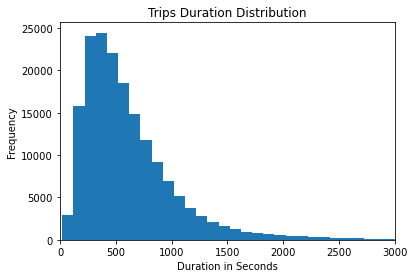

In [20]:
# Trip duration distribution using histogram

bins = np.arange(20, df['duration_sec'].max()+50, 100)
plt.hist(data = df , x = 'duration_sec' , bins = bins)
plt.xlim(0,3000)
plt.title('Trips Duration Distribution')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency')

#### We can see form this plot that most riders tend to have shorter trip durations at around 500, exact mean duration is 726 seconds. Let's move to the gender fequency.

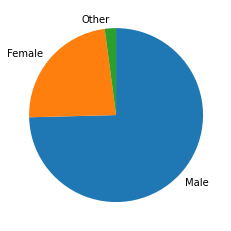

In [41]:
# Plotting gender frequency

gender_counts = df['member_gender'].value_counts()

plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False);

In [39]:
# Gender counts

df.member_gender.value_counts()

Male      126311
Female     40098
Other       3583
Name: member_gender, dtype: int64

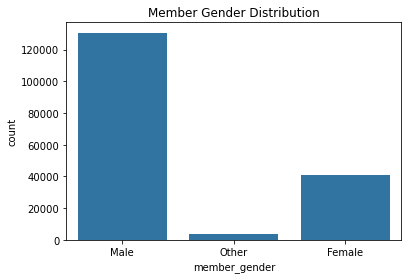

In [47]:
# Let's see the distribution with bar chart to have a better observation of the counts of each category

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender', color = base_color).set(title='Member Gender Distribution');

#### We can see from both charts that male are significantly higher than females in this dataset.

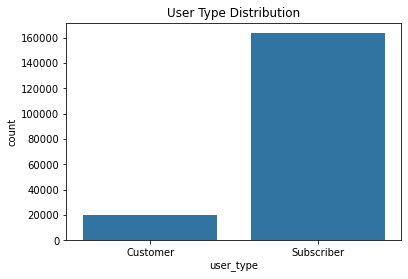

In [44]:
# Finally, let's see customers and sucbscribers distribution

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color).set(title='User Type Distribution');

In [146]:
df.user_type.value_counts()

Subscriber    153736
Customer       16256
Name: user_type, dtype: int64

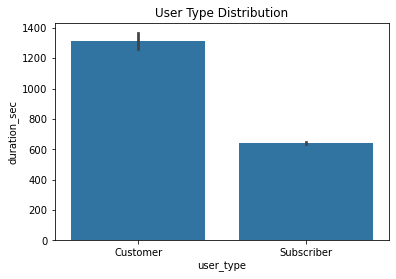

In [149]:
# Trip duration distribution between customers and subscribers.

base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'user_type', y= 'duration_sec', color = base_color).set(title='User Type Distribution');

#### From the bar chart, we can see that subscribers take more tripts than customers. We have 153736 trips for subscribers, versus 16256 for customers in the fordbike dataset. However, when it comes to trip duration, customers take longer trip durations per seconds than subscribers.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


> The trip duration is right-skewed, it shows that the most trips are on the shorter duration side, and they duration tend to get shorter as we count more trips. Most members are males, subscribers are signifcantly more than customers in terms of number, however in terms of trip duration is vice versa.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


> As the trip duration increase trip numbers decrease. The mean duration per sec is 726. Subscribers are 153736 versus customers who amount for 16256.

## Bivariate Exploration

To explore the age feauture and its relation to trip duration and gender, we will need to get first the age of the memebers and add it to the dataframe.

In [21]:
# Getting memebers age from the date of birth column

df['age'] = 2021 - df['member_birth_year']
df['age'].dtype

dtype('float64')

In [61]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0,37.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0,49.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0,32.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0,47.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,62.0,62.0


In [23]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
age                        0
dtype: int64

In [24]:
df.age.describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

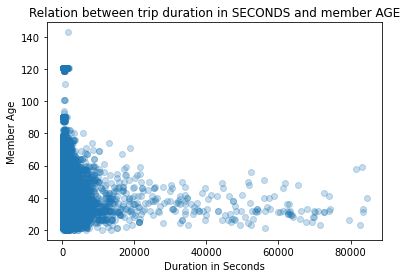

In [25]:
# plotting age versus trip duration

plt.scatter(data = df, x = 'duration_sec', y = 'age', alpha=5/20);
plt.xlabel('Duration in Seconds')
plt.ylabel('Member Age')
plt.title('Relation between trip duration in SECONDS and member AGE');

Most age groups are below the 20,000 seconds area. Let's add a hue to the plot to verify the findings. Also to be able to see more insighte we will need to convert the duration to minutes.

In [38]:
# Adding a column for trip duration in minutes

df['duration_min'] = df['duration_sec'] / 60
df.duration_min.describe()

<ipython-input-38-3a4463bbd05c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = df['duration_sec'] / 60


count    169992.000000
mean         11.717717
std          27.676933
min           1.016667
25%           5.383333
50%           8.483333
75%          13.100000
max        1409.133333
Name: duration_min, dtype: float64

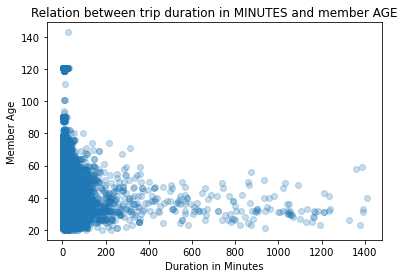

In [27]:
# Plotting data for duration in minutes and adding hue

plt.scatter(data = df, x = 'duration_min', y = 'age', alpha=5/20);
plt.xlabel('Duration in Minutes')
plt.ylabel('Member Age')
plt.title('Relation between trip duration in MINUTES and member AGE');

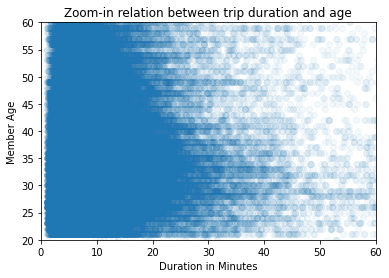

In [40]:
# Zoom-in for duration in minutes

plt.scatter(data = df, x = 'duration_min', y = 'age', alpha=1/20);
plt.ylim(20,60)
plt.xlim(0,60)
plt.xlabel('Duration in Minutes')
plt.ylabel('Member Age')
plt.title('Zoom-in relation between trip duration and age');

#### observation: We can see that more trips are below 30 minutes.

### We will now explore the relationship between age and gender. Since these are numeric and categoral variables we canexplore using a boxplot.

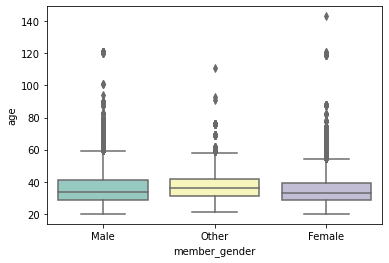

In [82]:
# Boxplot for gender and age distribution

sb.boxplot(data=df, x='member_gender', y='age', palette="Set3");

observation: There are some outliers, which are also incorrect since we will not consider ages above 80. Let's zoom in to our area of concern which is between 0 to 80

(0.0, 80.0)

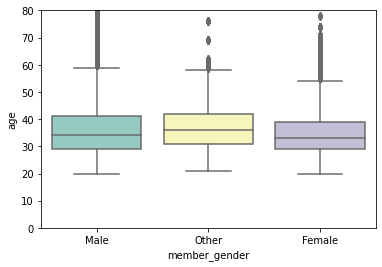

In [92]:
x = sb.boxplot(data=df, x='member_gender', y='age', palette="Set3");
x.set_ylim(0, 80)

observation: The age of users for both genders have similar bracket for 25-75% of the users. Male users have a slightly wider bracket it starts at 29 - 41, while females start almost a year younger and is a couple of years less than 40.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


> There is a negative correlation between age and trip duration, as member age increase especially above 50 years, the trip duration in minutes drops.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We haven't explored the relation to any of the secondary features.

## Multivariate Exploration

We will explore the 3 features of focus altogether, gender, age, and trip duration.

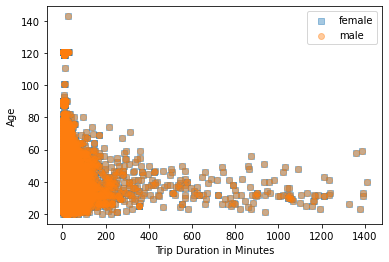

In [29]:
# Plot the the relation ship between age and duraiton for each gender using a scatter plot.

gender_markers = [['male', 's'],
               ['female', 'o']]

for gender, marker in gender_markers:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter(data = df, alpha=8/20, x = 'duration_min', y = 'age', marker = marker);
    plt.legend(['female','male'])

plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Age');

The relation is not clear as most points are cluttered due to big range in age, we don't need to explore the age above 60 for now, also age from 100 and more is not realistic.

In [31]:
# remove age above 60

df = df.query('age <= 60')

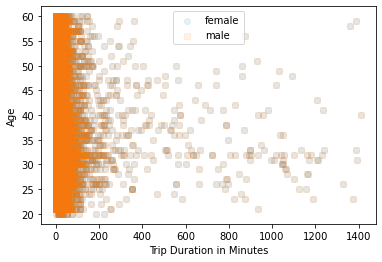

In [36]:
# Re-doing our scatterplot after filtering out age above 60

gender_markers = [['female', 'o'],
               ['male', 's']]

for gender, marker in gender_markers:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter(data = df, alpha=2/20, x = 'duration_min', y = 'age', marker = marker);
    plt.legend(['female','male'])
    
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Age');

#### observation: We can see from this plot that for males and females the comparison is fair, almost the same when it comes the age and trip duration. However no clear correlation. The datapoint aren't very clear here, there should be another way to say datapoints clearer.

We will try another plot to see dat apoints clearer to confim our observation.

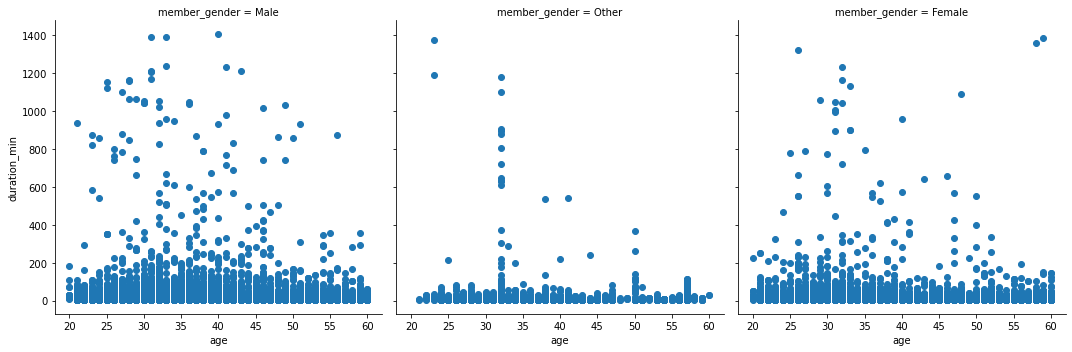

In [41]:
# Plotting the duraion and age for each gender, using a scatterplot in a facetgrid.
df = df.query('age <= 60')

g = sb.FacetGrid(data = df, col = 'member_gender', height=5,
                margin_titles = True)
g.map(plt.scatter, 'age', 'duration_min');

#### Observation: We can see that for both males and females, trip duration below 200 minutes is the most popular for all ages, however, males have more datapoints in the above 200 minutes area than females. We can also see that for males there are more longer duration trips in the age ranges between 30 and 35 than in the female distribution.

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


> We can see that male gender, age between 30 and 35 have the longest trip duration.

## Were there any interesting or surprising interactions between features?

> The surpriseing thing is that there is no certian correlation between age and trip duration, it can be expected that as age increase duration decreases, how the duration is the longest at a certain age range, and it isn't necessarily the youngest(20 years old) among users, and then it lowers as you go up

# Conlusions Summary

### <ul><li> Average trips in general, regardless of the rider or trip features, take 726 seconds.</li><br><li> The males share of trips in this dataset is more than 50% of the females</li><br><li> If a user is a subscriber they tend to take more trips than customers, however, Customers take longer trips than subscribers, it could be related to the cost of the trips but this is beyond the data we have here to validate.</li><br><li>Longer trip durations are popular between 30-40 years old.</li><br><li>Riders age in this dataset is more between 30-40 years old for both genders</li><br><li>Higher trips durations are a combination between male gender and 30-45 years old. In the case of females, 30-35 is the most popular age.</li>